In [2]:
import sys, os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

print(sys.path[-1]) 

c:\Users\Shraddha\OneDrive\Desktop\forecast_alerting


Operations shape: (1460, 13)
Site Meta shape: (4, 4)
        date site_id  units_produced  downtime_minutes  power_kwh  \
0 2025-01-01      S1            1280                34       4211   
1 2025-01-02      S1            1249               193       5471   
2 2025-01-03      S1            1163                43       4178   
3 2025-01-04      S1            1348                32       4554   
4 2025-01-05      S1               0                 0          0   

   rework_units  defects_ppm  staff_count  material_cost_per_unit  \
0            27          453           56                   71.94   
1            40          480           55                   71.87   
2            33          454           53                   72.04   
3            35          387           54                   72.26   
4             0            0            0                    0.00   

   price_per_unit  temperature_c  rainfall_mm  holiday_flag region  \
0           96.04           21.7          0.0  

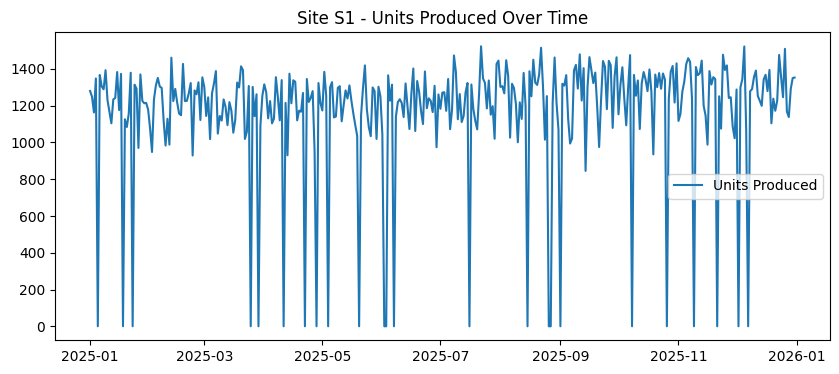

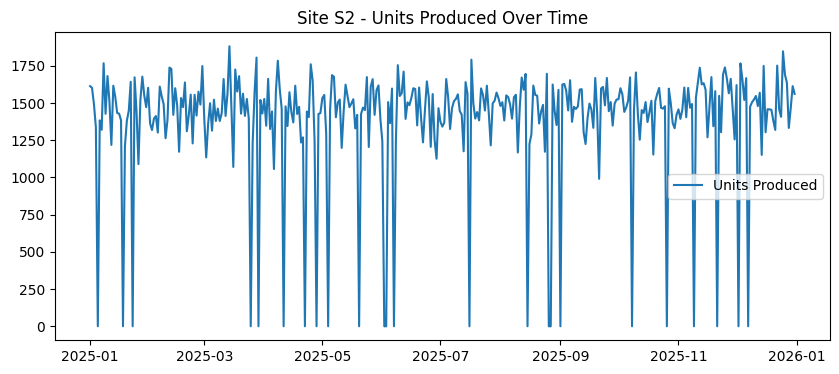

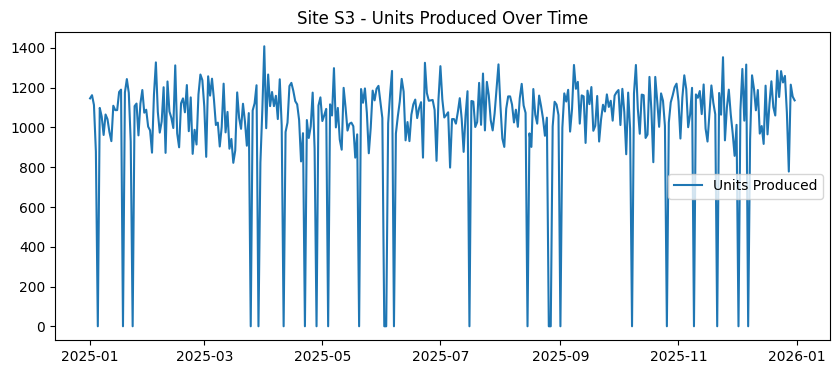

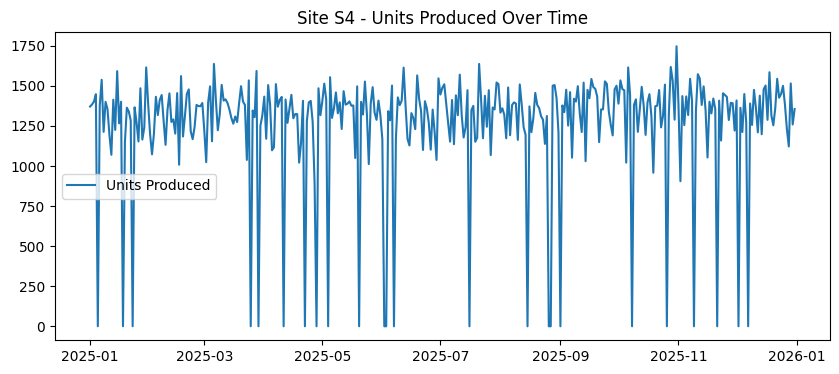

In [3]:


import pandas as pd
import matplotlib.pyplot as plt
from src.loader import load_operations, load_site_meta

ops_df = load_operations("365d")
site_df = load_site_meta()

print("Operations shape:", ops_df.shape)
print("Site Meta shape:", site_df.shape)


df = ops_df.merge(site_df, on="site_id", how="left")


print(df.head())

for site in df["site_id"].unique():
    site_data = df[df["site_id"] == site]
    plt.figure(figsize=(10,4))
    plt.plot(site_data["date"], site_data["units_produced"], label="Units Produced")
    plt.title(f"Site {site} - Units Produced Over Time")
    plt.legend()
    plt.show()
